In [2]:
! pip install pandas_datareader

     |████████████████████████████████| 112kB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 14.5MB/s eta 0:00:01


In [3]:
import pandas_datareader as dr

In [7]:
apple_stock_data = dr.get_data_yahoo("AAPL", "2005-05-10", "2020-05-31")

In [8]:
apple_stock_data.shape

(3790, 6)

In [10]:
import matplotlib.pyplot as plt

In [11]:
apple_stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-05-10,5.321429,5.190000,5.250000,5.202857,110065900.0,4.504099
2005-05-11,5.095714,4.730000,5.028572,5.087143,510495300.0,4.403927
2005-05-12,5.084286,4.857143,5.060000,4.875714,242560500.0,4.220893
2005-05-13,5.032857,4.867143,4.885714,4.967143,175678300.0,4.300044
2005-05-16,5.100000,4.932857,4.937143,5.078571,118573700.0,4.396507


Text(0, 0.5, 'Apple Stock Price')

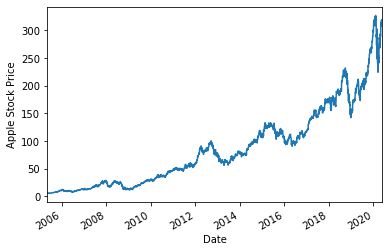

In [14]:
apple_stock_data["Close"].plot()
plt.xlabel("Date")
plt.ylabel("Apple Stock Price")

Text(0, 0.5, 'Apple Stock Price')

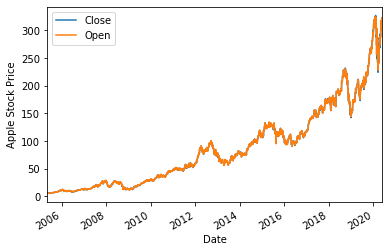

In [15]:
apple_stock_data[["Close", "Open"]].plot()
plt.xlabel("Date")
plt.ylabel("Apple Stock Price")

In [16]:
close = apple_stock_data["Close"]

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scalar = MinMaxScaler()
close = scalar.fit_transform(close.values.reshape((-1,1)))

In [25]:
close.shape

(3790, 1)

In [26]:
dates = apple_stock_data.index

In [27]:
dates

DatetimeIndex(['2005-05-10', '2005-05-11', '2005-05-12', '2005-05-13',
               '2005-05-16', '2005-05-17', '2005-05-18', '2005-05-19',
               '2005-05-20', '2005-05-23',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', name='Date', length=3790, freq=None)

In [28]:
input_X = []
y = []
dates_data = []

for i in range(60, close.shape[0]):
    input_X.append(close[i-60:i])
    y.append(close[i])
    dates_data.append(dates[i])

In [34]:
import numpy as np
input_X = np.array(input_X).reshape((3730,60))
y = np.array(y).reshape((3730,))
dates_data = np.array(dates_data).reshape((3730,))

In [35]:
input_X.shape

(3730, 60)

In [36]:
y.shape

(3730,)

In [37]:
training_data_threshold = int(0.8 * input_X.shape[0])

training_X = input_X[0:training_data_threshold]
training_y = y[0:training_data_threshold]
training_dates = dates_data[0:training_data_threshold]

testing_X = input_X[training_data_threshold:]
testing_y = y[training_data_threshold:]
testing_dates = dates_data[training_data_threshold:]

In [38]:
training_X.shape

(2984, 60)

In [39]:
testing_X.shape

(746, 60)

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
model = keras.Sequential()

model.add(keras.layers.Dense(100, input_shape = (60,)))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(1))

In [42]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [45]:
model.fit(training_X, training_y, epochs = 1, batch_size=1)

Train on 2984 samples
2984/2984 [==============================] - 4s 1ms/sample - loss: 7.9440e-04


In [46]:
predictions_on_test = model.predict(testing_X)

In [47]:
predictions_on_test[0]

array([0.44509482], dtype=float32)

In [48]:
predictions_on_test_trasformed = scalar.inverse_transform(predictions_on_test)

In [49]:
predictions_on_test_trasformed[0]

array([148.34059], dtype=float32)

In [51]:
training_y_transformed = scalar.inverse_transform(training_y.reshape((-1,1)))

In [52]:
testing_y_transformed = scalar.inverse_transform(testing_y.reshape((-1,1)))

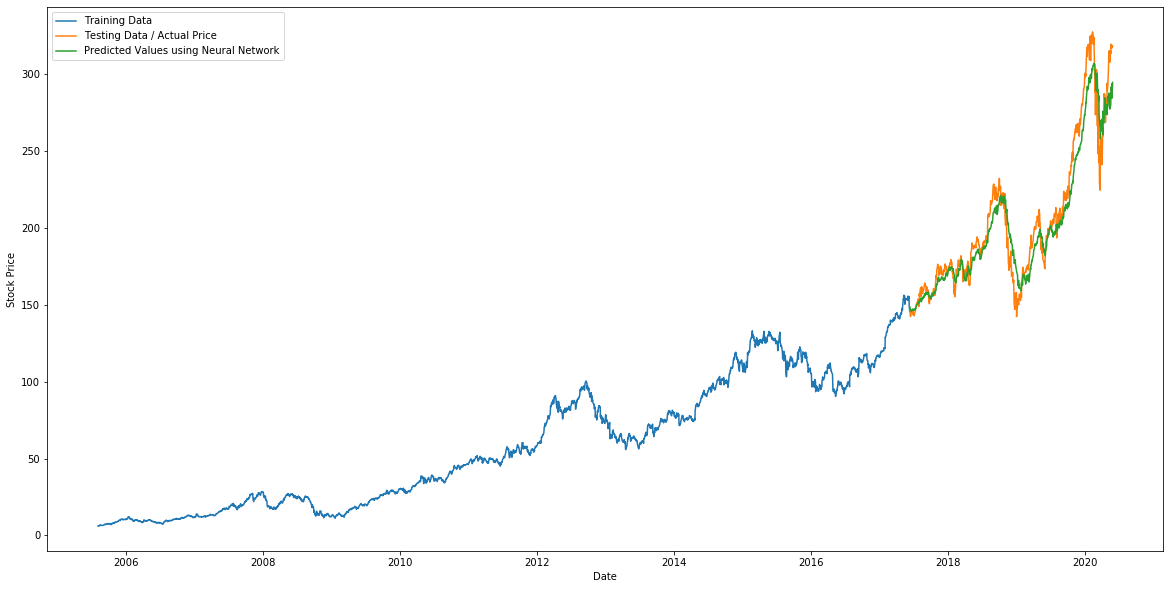

In [55]:
plt.figure(figsize = (20,10))
plt.plot(training_dates, training_y_transformed, label = "Training Data")
plt.plot(testing_dates, testing_y_transformed, label = "Testing Data / Actual Price")
plt.plot(testing_dates,predictions_on_test_trasformed, label = "Predicted Values using Neural Network")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend(loc = "best")
plt.show()